<a href="https://colab.research.google.com/github/SeniyaSultan/plastic-classification-cnn/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drive-download-20250720T150508Z-1-001.zip to drive-download-20250720T150508Z-1-001 (1).zip


In [ ]:
uploaded.keys()


dict_keys(['drive-download-20250720T150508Z-1-001 (1).zip'])

In [ ]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['drive-download-20250720T150508Z-1-001 (1).zip']), 'r') as zip_ref:
    zip_ref.extractall('/content/plastics_data')



In [ ]:
import os

# List the subfolders (classes)
path = '/content/plastics_data'
print("Classes found:", os.listdir(path))


Classes found: ['.DS_Store', 'HDPE', 'PET', 'LDPA', 'PP']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25,  # 75% training, 25% validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    '/content/plastics_data',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_data = datagen.flow_from_directory(
    '/content/plastics_data',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)


Found 436 images belonging to 4 classes.
Found 143 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 30
steps_per_epoch = train_data.samples // BATCH_SIZE
validation_steps = val_data.samples // BATCH_SIZE

history = model.fit(
    train_data,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,
    validation_steps=validation_steps,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 67s 5s/step - accuracy: 0.2880 - loss: 3.1554 - val_accuracy: 0.2891 - val_loss: 1.6398
Epoch 2/30
 1/13 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.2188 - loss: 1.4324

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 621ms/step - accuracy: 0.2188 - loss: 1.4324 - val_accuracy: 0.2656 - val_loss: 1.5447
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - accuracy: 0.4136 - loss: 1.3599 - val_accuracy: 0.3516 - val_loss: 1.3614
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 549ms/step - accuracy: 0.4375 - loss: 1.2661 - val_accuracy: 0.2812 - val_loss: 1.3679
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - accuracy: 0.3827 - loss: 1.2637 - val_accuracy: 0.3438 - val_loss: 1.4603
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 490ms/step - accuracy: 0.3438 - loss: 1.6956 - val_accuracy: 0.3594 - val_loss: 1.3821
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 83s 6s/step - accuracy: 0.4487 - loss: 1.2570 - val_accuracy: 0.3594 - val_loss: 1.5625
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 599ms/step - accuracy: 0.4688 - loss: 1.1655 - val_accuracy: 0.3359 - val_loss: 1.6116
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 119s 5s/step - accuracy: 0.4894 - loss: 1.1647 - val_accuracy: 0.4062 - val_loss

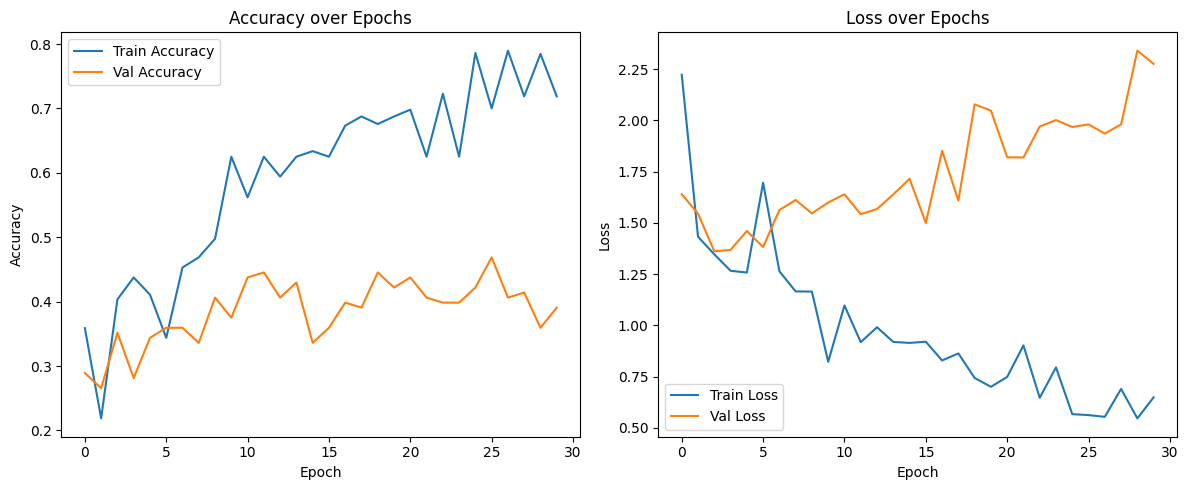

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step


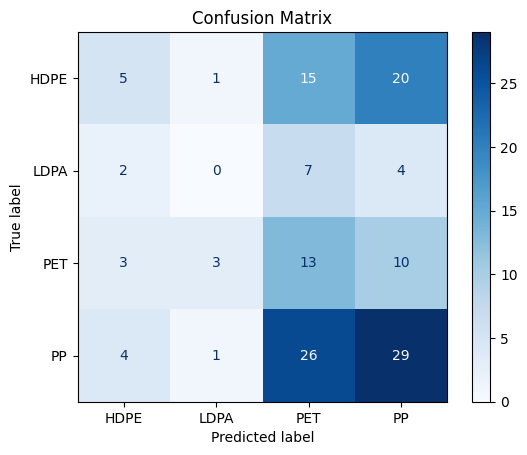

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes
val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_data.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
